# Employee Performance Prediction (HR Analytics Project)

## Project Overview
This project uses machine learning to predict employee performance ratings based on workplace factors such as job satisfaction, experience, salary and training.

## Business Problem
Organisations can use predictive analytics to identify high-performing employees, optimize promotions and improve workforce productivity.

## Relevance to Kenyan Organizations
Companies in Kenya (banks,insurance firms, NGOs) can use HR analytics to improve employee retention and performance management

In [155]:
#Import the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

In [156]:
#form the path to the excel file
data='INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'

In [157]:
#read the excel file
df=pd.read_excel(data)


In [158]:
#display of the first five rows of the dataset
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [159]:
df.shape #displays the number of rows and columns
df.info() #Checking for data information
df.describe() #Checking for the data characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


The dataset has 1200 rows and 28 columns

The dataset has the following columns: 

-EmpEducationLevel: This column records the highest level of formal education attained by the employee, with ordinal levels ranging from 'Below College' (1) to 'Doctor' (5). It represents a progression in formal education.

-EmpEnvironmentSatisfaction: This reflects how satisfied employees are with their work environment, with ratings from 'Low' (1) to 'Very High' (4). A higher number indicates a better perception of the work environment.

-EmpJobInvolvement: This measures the level of engagement and commitment employees have with their job, rated from 'Low' (1) to 'Very High' (4). Higher involvement typically correlates with better job performance.

-EmpJobSatisfaction: This indicates how content employees are with their job, with levels ranging from 'Low' (1) to 'Very High' (4). Job satisfaction can influence turnover, productivity, and overall employee morale.

-PerformanceRating: The performance rating is an assessment of an employee's work performance, classified from 'Low' (1) to 'Outstanding' (4). It's a critical measure often used for decisions on promotions, bonuses, and other HR-related policies.

-EmpRelationshipSatisfaction: This column gauges how satisfied employees are with their relationships at work, with ratings from 'Low' (1) to 'Very High' (4). Good work relationships can enhance teamwork and job satisfaction.

-EmpWorkLifeBalance: This measures how well employees feel they are balancing their work and personal life, with categories ranging from 'Bad' (1) to 'Best' (4). A healthy work-life balance is essential for employee well-being and long-term job performance

In [160]:
#Data cleaning and preprocessing
#Check for duplicates, missing values and outliers

df.duplicated().sum() #Displays the number of duplicates in the dataset

0

In [161]:
df.isnull().sum() #Displays the number of missing values in the dataset

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

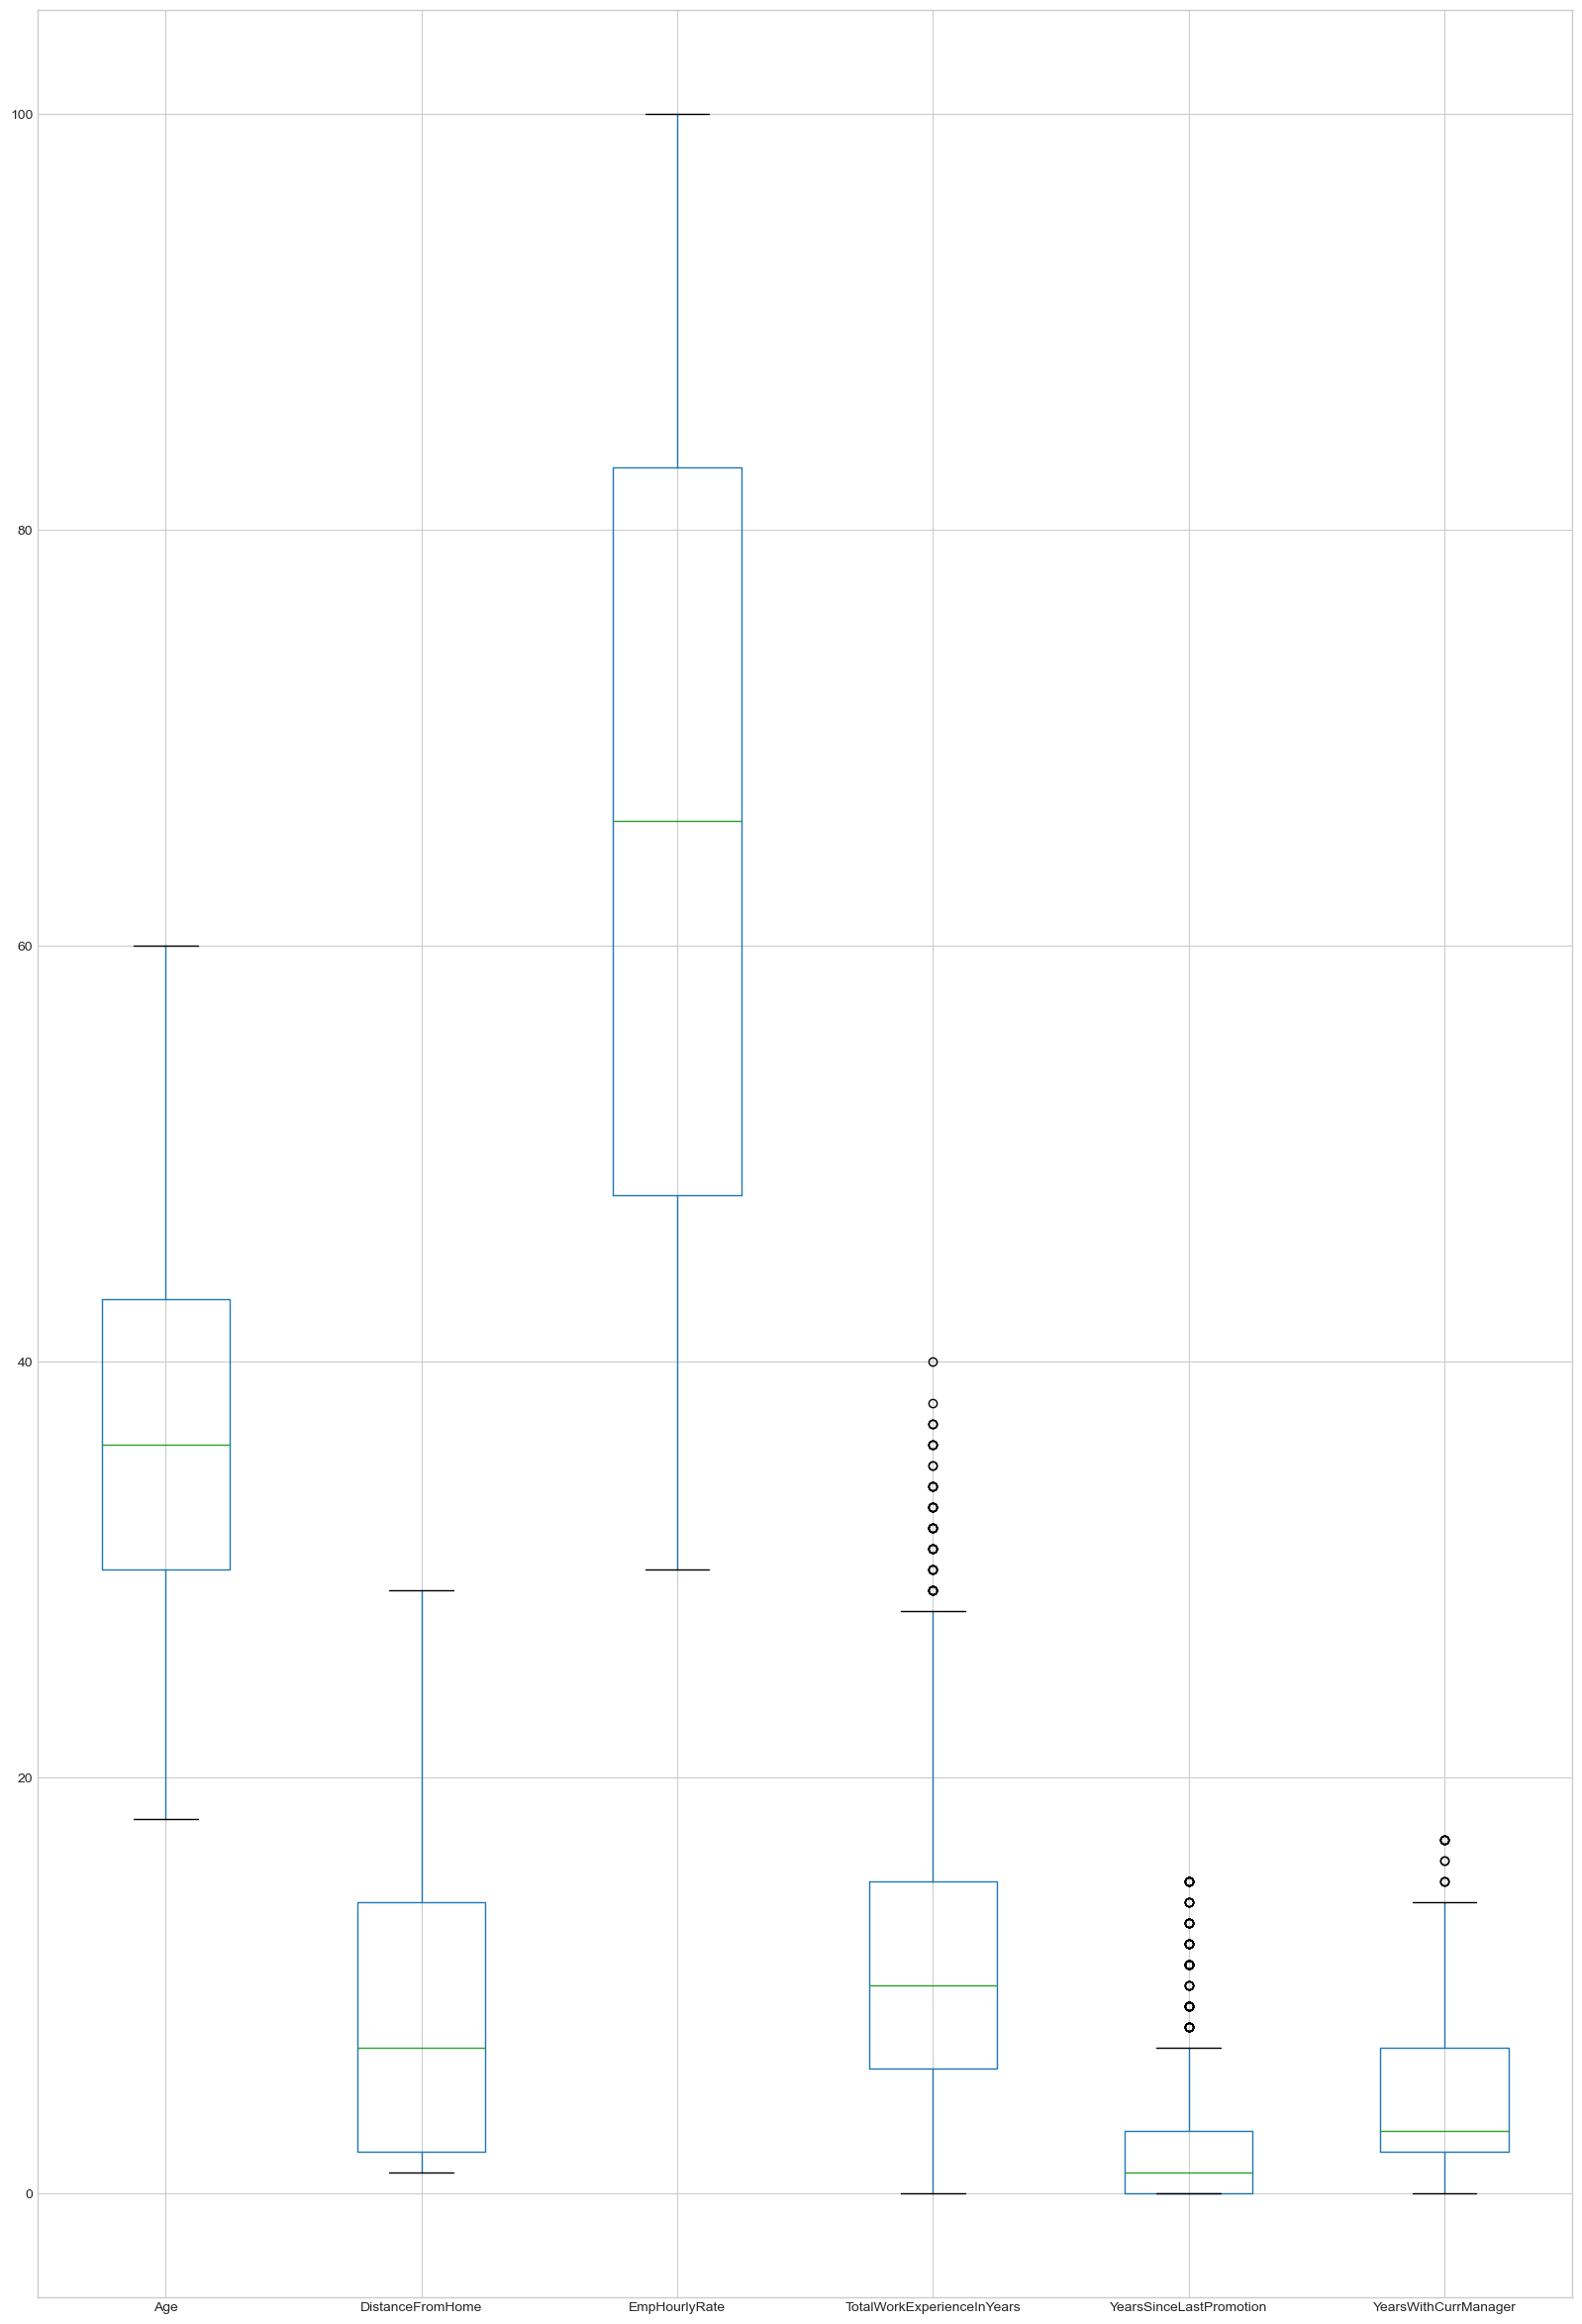

In [162]:
#Checking for outliers using boxplot
#considered numerical columns only

#Adjusted the figure size before creating the boxplot
plt.figure(figsize=(20, 30))

#Created the boxplot
df.boxplot(column=['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

#the plot
plt.show()

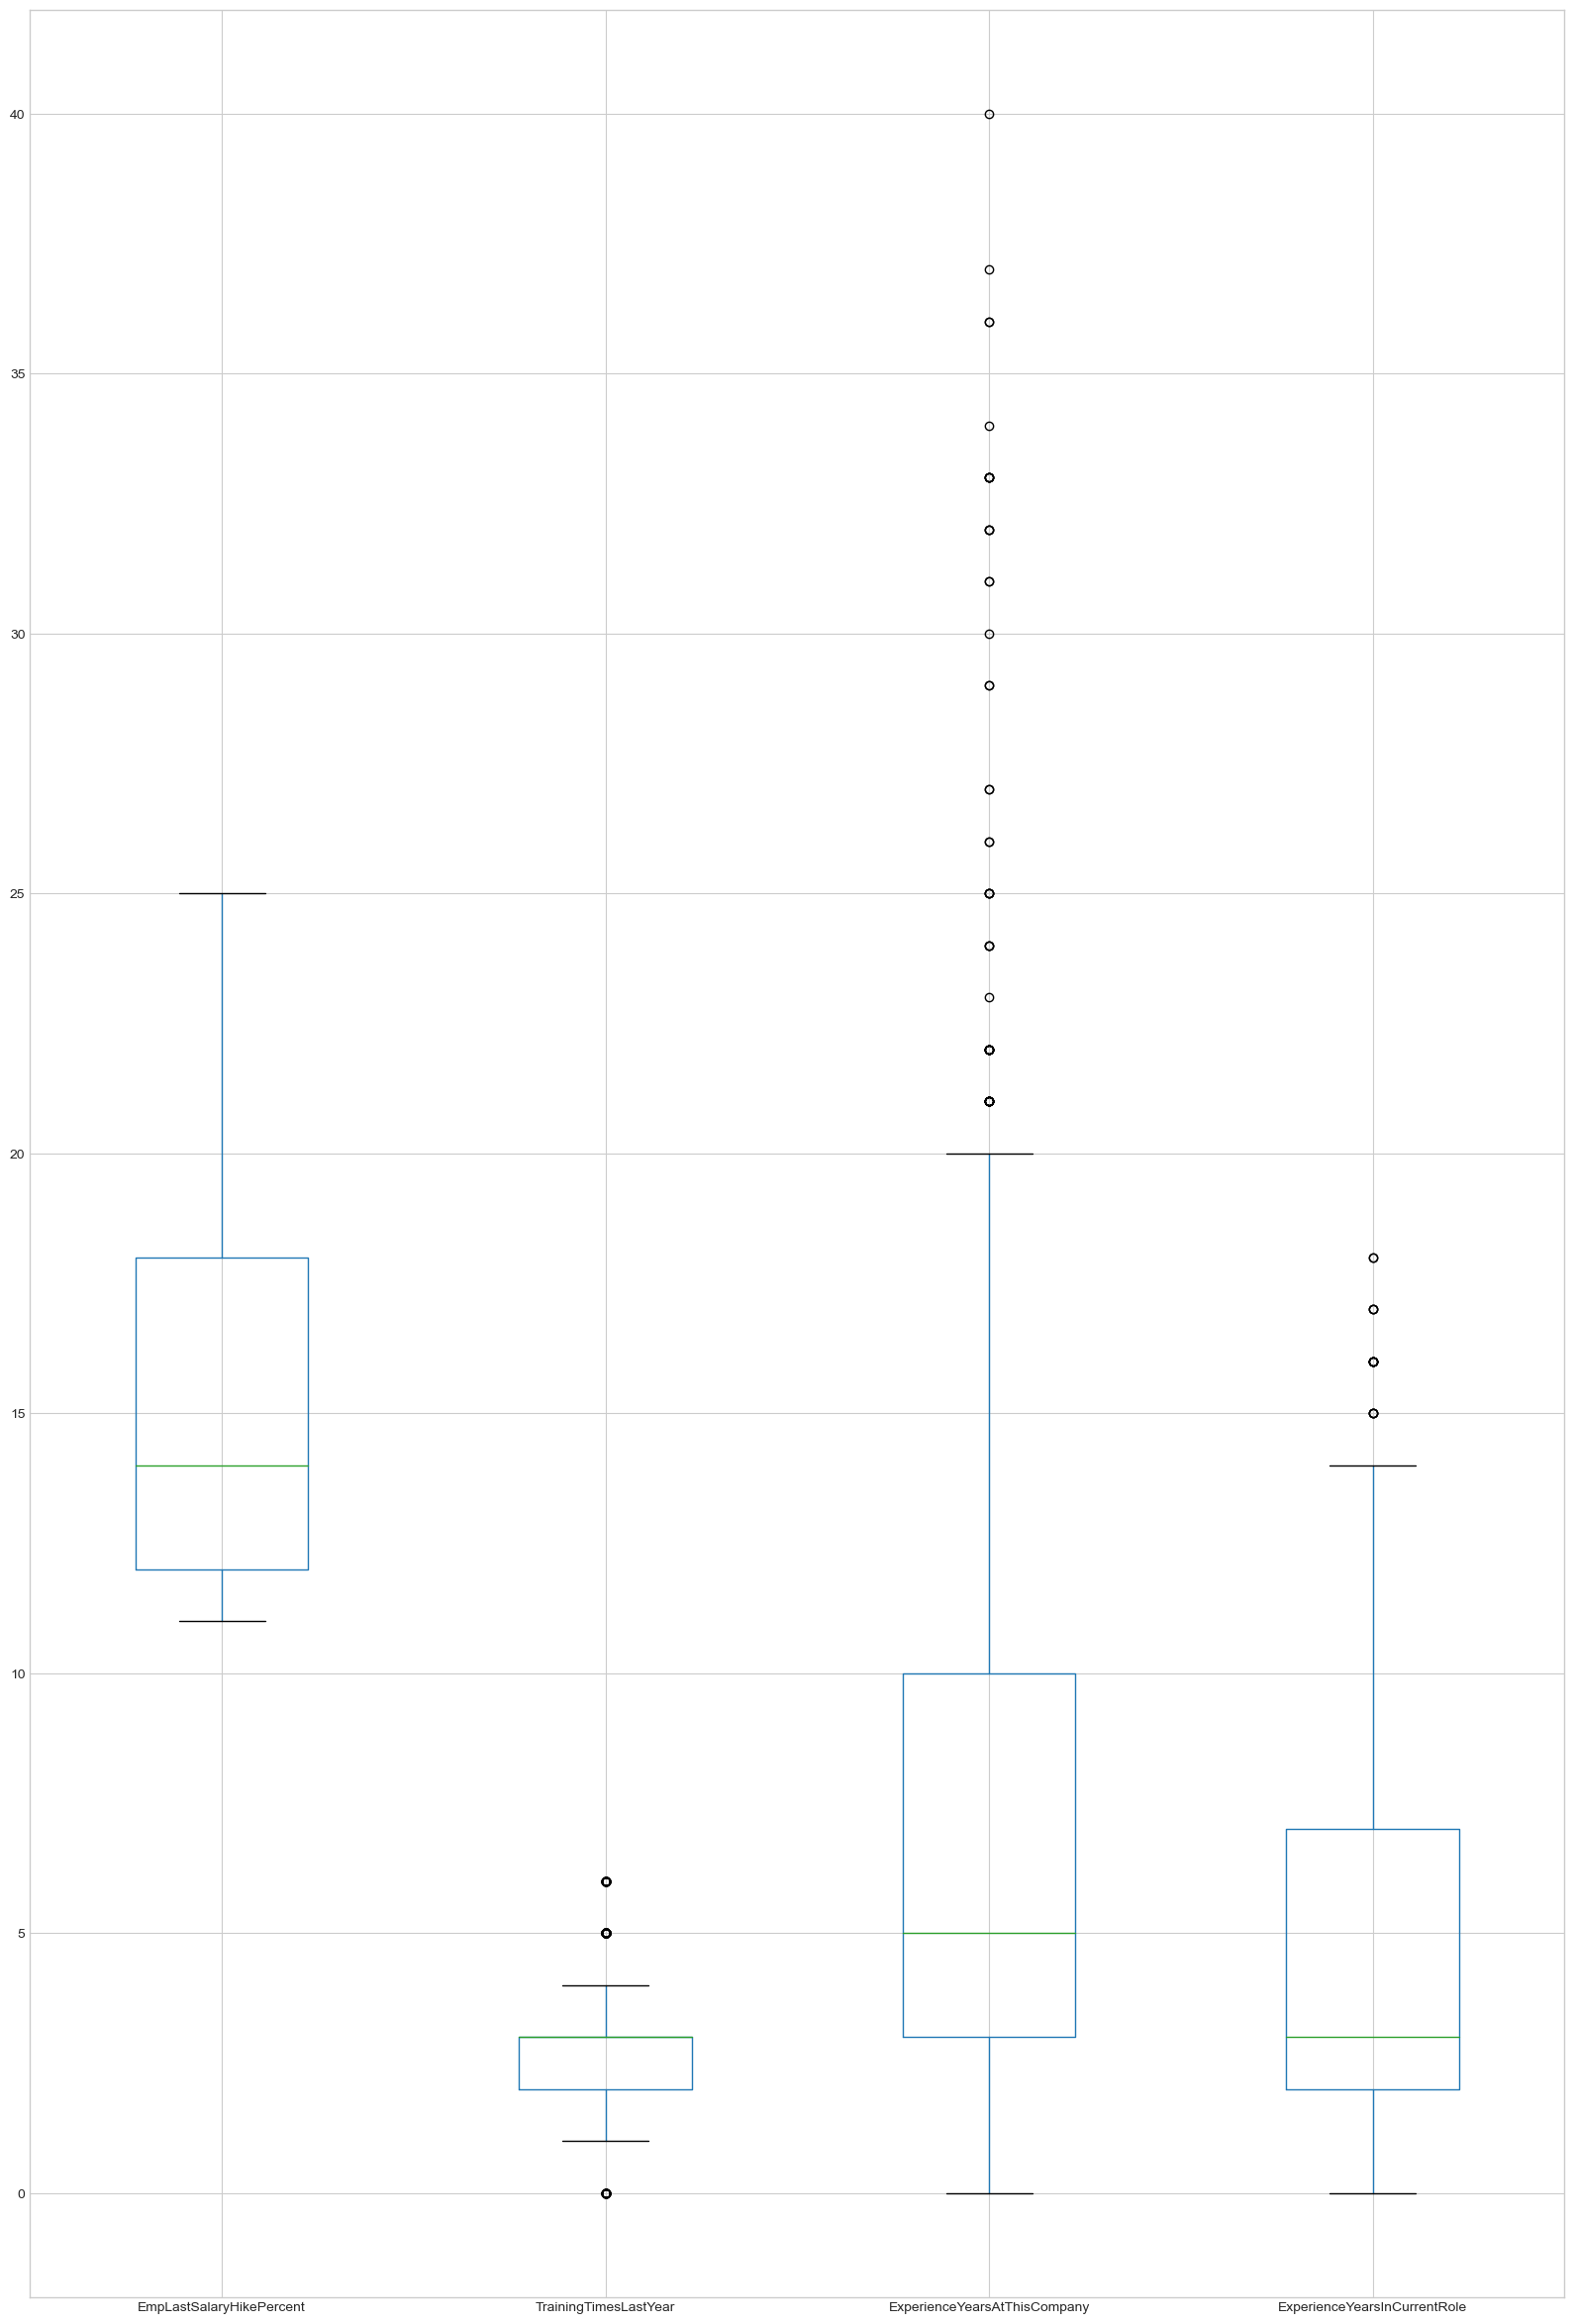

In [163]:
plt.figure(figsize=(20, 30))

df.boxplot(column=['EmpLastSalaryHikePercent', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole'])

plt.show()

Notes


-No missing values
-No duplicates
-There are significant outliers in select columns:

-TotalWorkExperienceInYears: Outliers in this column suggest that there are employees with significantly more total work experience than their peers. This could indicate the presence of highly seasoned professionals or veterans in specific roles or departments. It may also reflect a diverse workforce in terms of experience levels.

-YearsSinceLastPromotion: Outliers here indicate employees who have not received a promotion for a much longer time than typical within the company. This could point to potential issues in career progression or dissatisfaction among these employees. It might also reflect roles with longer paths to advancement or a highly stable workforce where employees stay in roles for extended periods.

-YearsWithCurrManager: Significant outliers in this column could suggest that some employees have been working with the same manager for an unusually long time. This could imply strong, stable working relationships, or it might indicate a lack of managerial rotation or opportunities for employees to experience different leadership styles.

-TrainingTimesLastYear: Outliers in this category could indicate employees who received an unusually high amount of training in the last year. This might be due to new job requirements, personal skill development, transitions to new roles, or a focus on specific training programs within the company.

-ExperienceYearsAtThisCompany: Employees who are outliers in this column have been at the company significantly longer than their colleagues. This can suggest a loyal base of long-term employees. It might also reflect a disparity in tenure within the company, with some employees having deep institutional knowledge and others being relatively new.

-ExperienceYearsInCurrentRole: Outliers here are employees who have spent much more time in their current role than is typical. This could imply a high level of specialization or satisfaction with their current position. Alternatively, it might highlight a lack of upward mobility or the employee's preference to remain in a familiar role.

*the dataset is clean. 
*the outliers indicate significant extreme scales in the dataset and thus not necessary to eliminate them. 


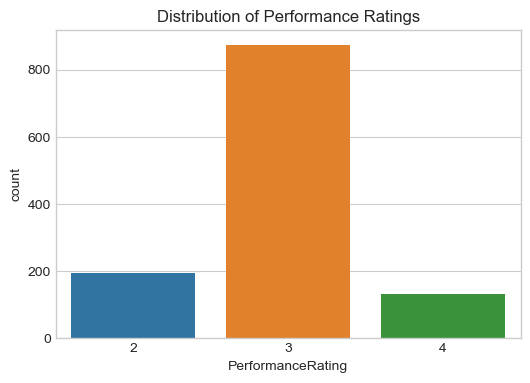

In [164]:
#Exploratory Data Analysis
#Target Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="PerformanceRating", data=df)
plt.title("Distribution of Performance Ratings")
plt.show()


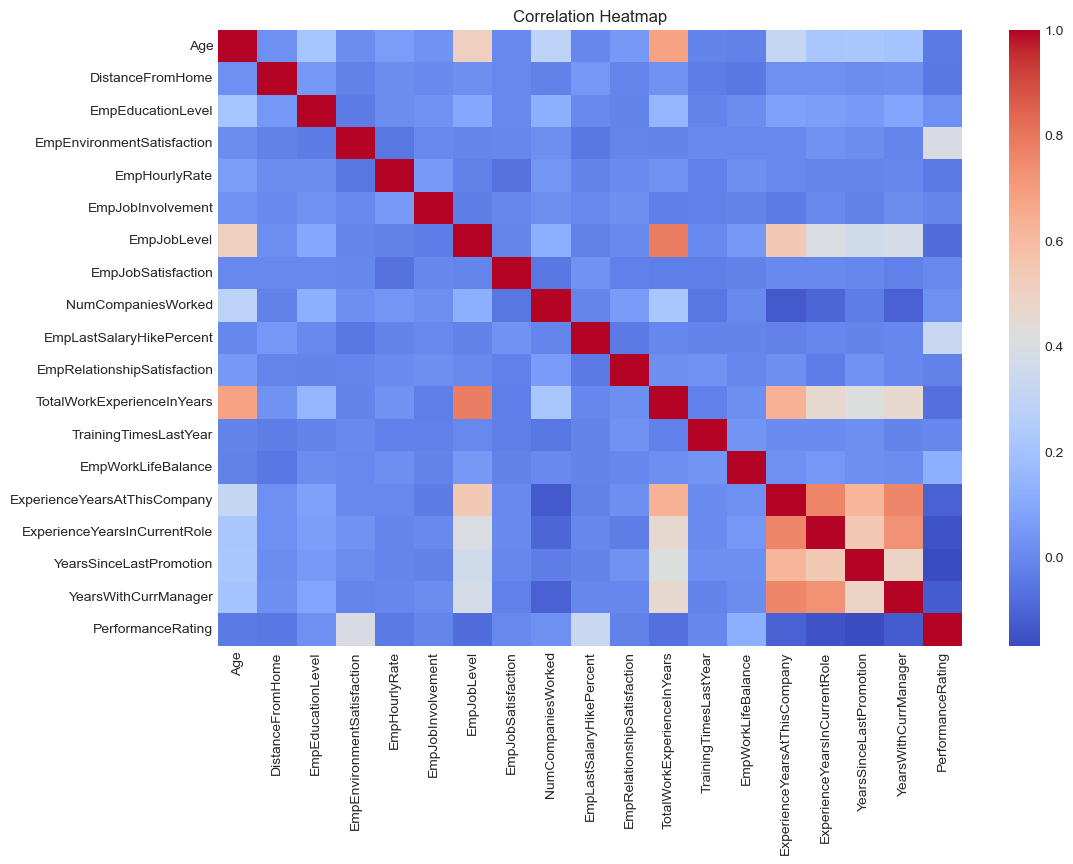

In [165]:
#Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


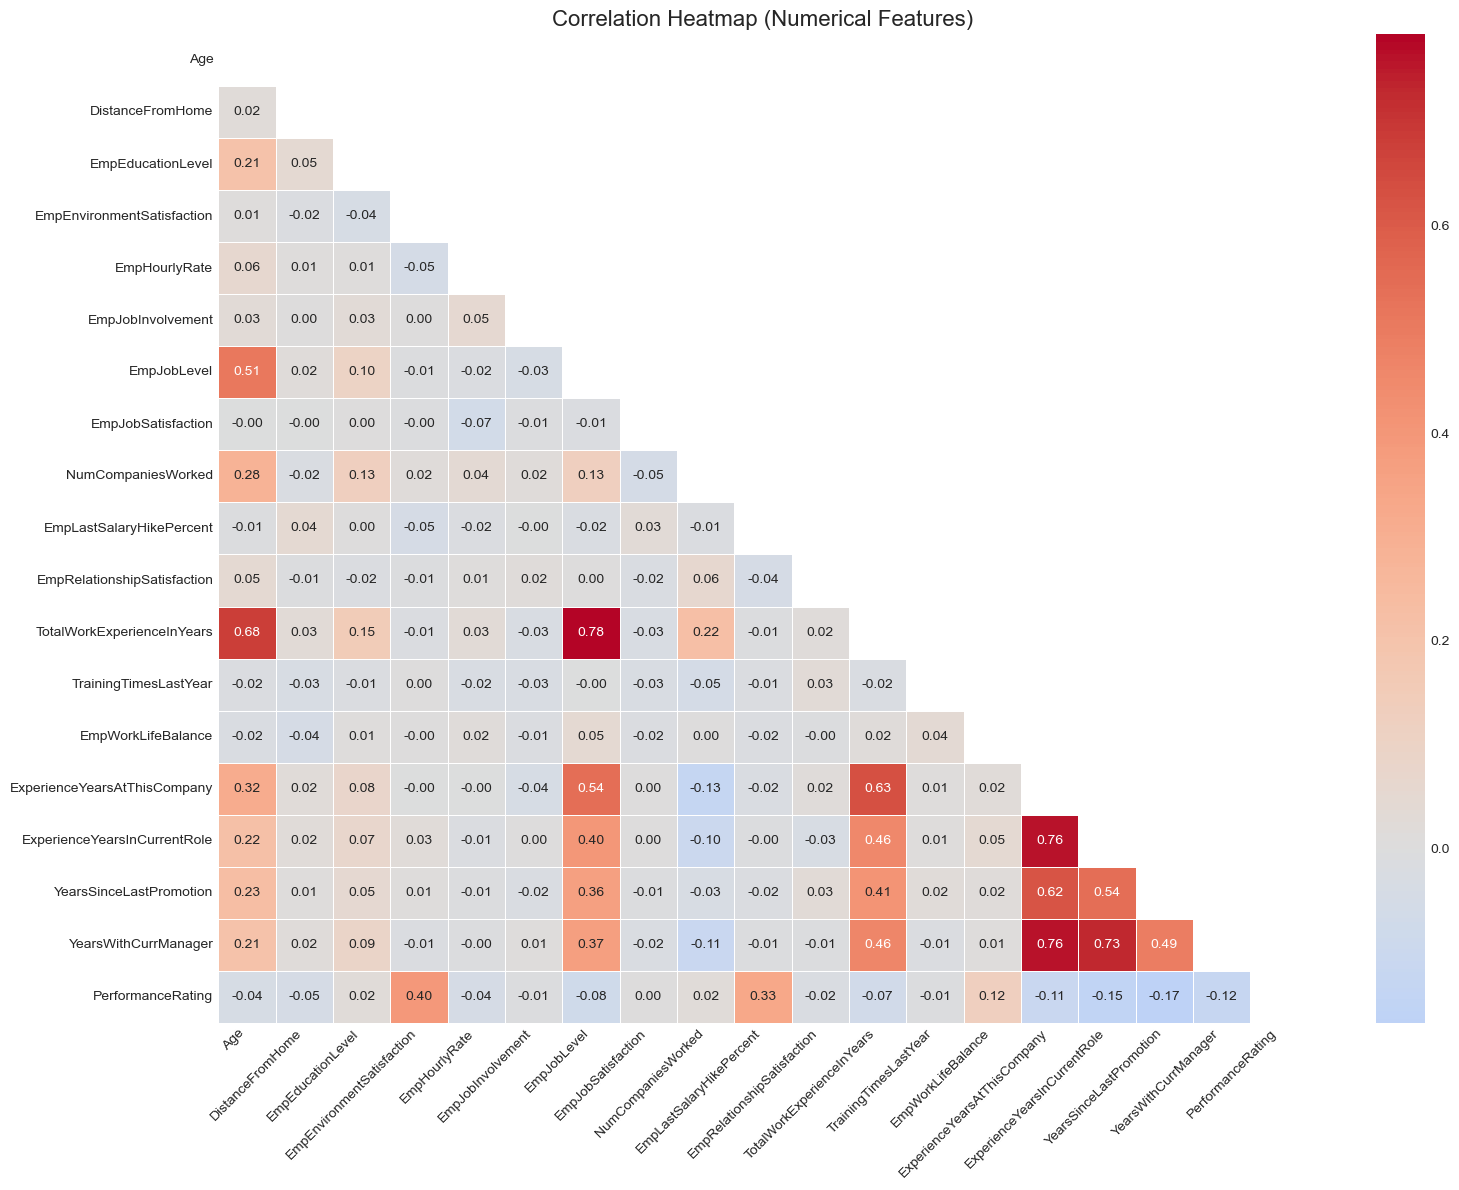

In [166]:
#Selected only numerical columns
numeric_df = df.select_dtypes(include=np.number)

#Computed the correlation matrix
correlation= numeric_df.corr()

#Created a mask for upper triangle
mask=np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(16,12))
sns.heatmap(
    correlation,mask=mask, cmap="coolwarm",center=0,linewidths=0.5, annot=True, fmt=".2f" )
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [167]:
# Sort the correlations with PerformanceRating in descending order
correlation_performance = correlation['PerformanceRating'].abs().sort_values(ascending=False)
correlation_performance

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.167629
ExperienceYearsInCurrentRole    0.147638
EmpWorkLifeBalance              0.124429
YearsWithCurrManager            0.122313
ExperienceYearsAtThisCompany    0.111645
EmpJobLevel                     0.076632
TotalWorkExperienceInYears      0.068141
DistanceFromHome                0.046142
EmpHourlyRate                   0.043116
Age                             0.040164
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EmpRelationshipSatisfaction     0.019502
EmpJobInvolvement               0.010539
TrainingTimesLastYear           0.005443
EmpJobSatisfaction              0.000606
Name: PerformanceRating, dtype: float64

From the Above Information The top 3 Factors that affect performance are:
1. EmpEnvironmentSatisfaction
2. EmpLastSalaryHikePercent
3. YearsSinceLastPromotion 

Checking the factors which have little or no effect to the Performance of an employee

In [168]:
#Displayed factors with low correlation

low_correlation_features = correlation_performance[correlation_performance < 0.1].index
low_correlation_features

Index(['EmpJobLevel', 'TotalWorkExperienceInYears', 'DistanceFromHome',
       'EmpHourlyRate', 'Age', 'NumCompaniesWorked', 'EmpEducationLevel',
       'EmpRelationshipSatisfaction', 'EmpJobInvolvement',
       'TrainingTimesLastYear', 'EmpJobSatisfaction'],
      dtype='object')

DEPARTMENT-WISE PERFORMANCE


In [169]:
#Checked for the number of Departments
df['EmpDepartment'].unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [170]:
#Grouped by EmpDepartment and calculated the mean for each department
dep_performance=df.groupby('EmpDepartment').mean()

#Displayed the department-wise performance
dep_performance['PerformanceRating']

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

As we can see the top 3 Departments in terms of perfomance are:
1. Development
2. Data Science
3. Human Resources

Visualization of Department-wise performance

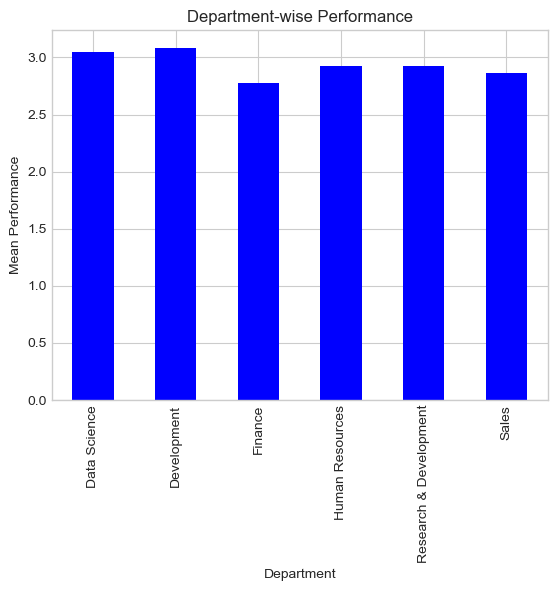

In [171]:
# Plotting a bar chart
dep_performance['PerformanceRating'].plot(kind='bar', color='blue')
plt.title('Department-wise Performance')
plt.xlabel('Department')
plt.ylabel('Mean Performance')
plt.show()

Further analysis of how different factors influence performance

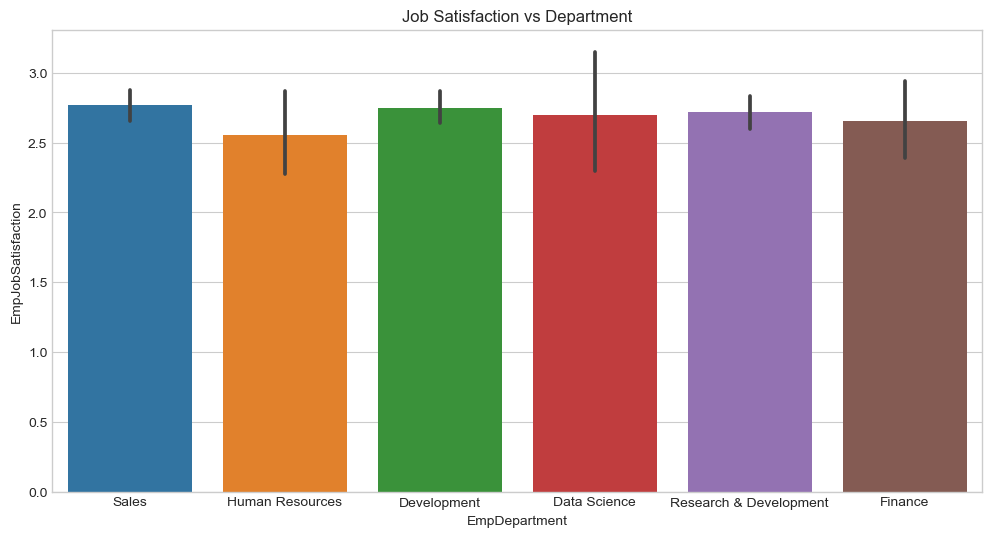

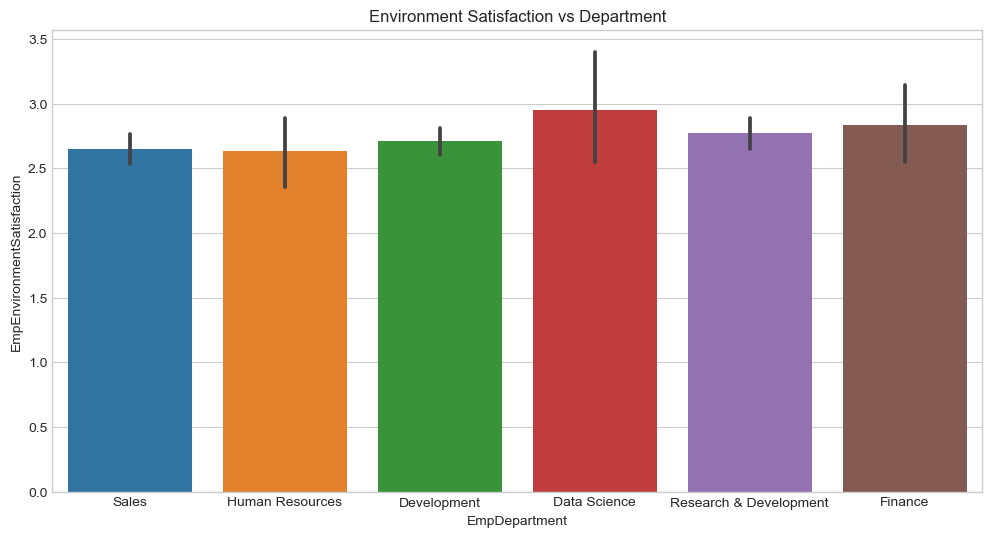

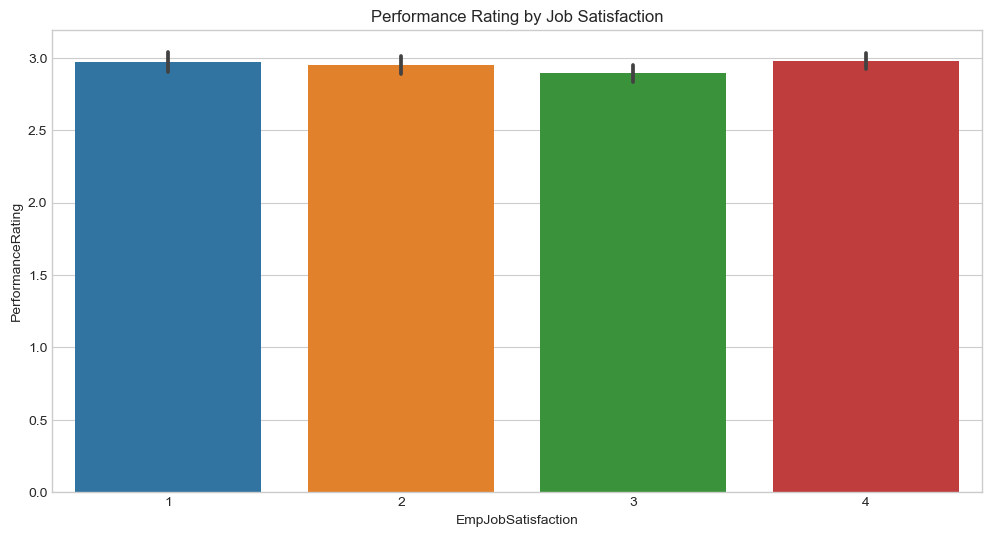

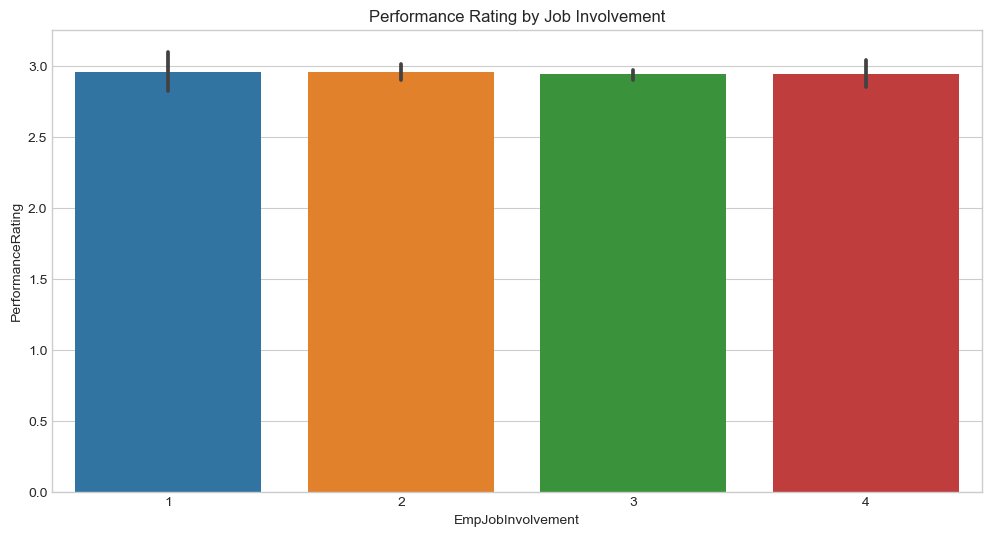

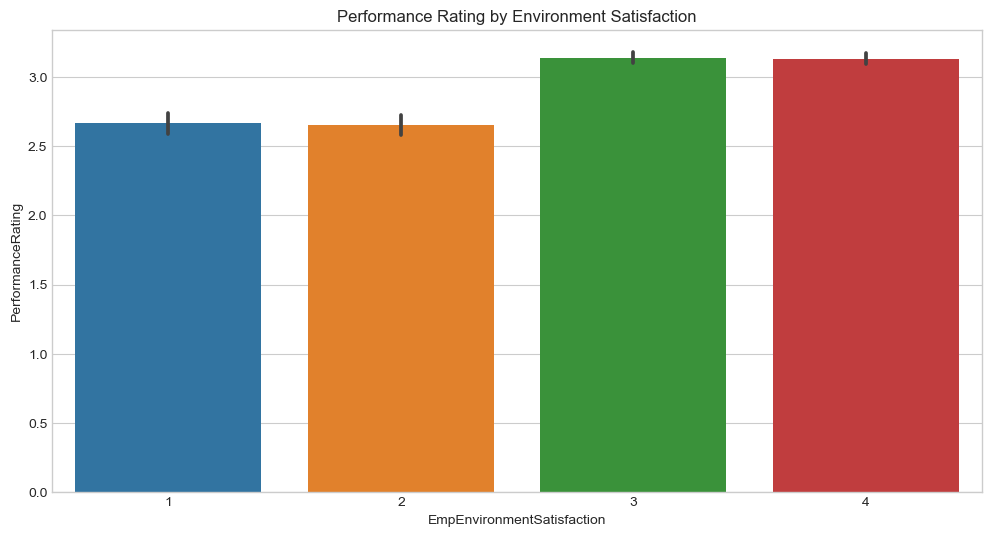

In [172]:
#Variables Visualization


# Job Satisfaction vs Department
plt.figure(figsize=(12, 6))
sns.barplot(x='EmpDepartment', y='EmpJobSatisfaction', data=df)
plt.title('Job Satisfaction vs Department')
plt.show()

# Environment Satisfaction vs Department
plt.figure(figsize=(12, 6))
sns.barplot(x='EmpDepartment', y='EmpEnvironmentSatisfaction', data=df)
plt.title('Environment Satisfaction vs Department')
plt.show()

# Performance Rating in relation to Job Satisfaction
plt.figure(figsize=(12, 6))
sns.barplot(x='EmpJobSatisfaction', y='PerformanceRating', data=df)
plt.title('Performance Rating by Job Satisfaction')
plt.show()

#Performance Rating in relation to Job Involvement
plt.figure(figsize=(12,6))
sns.barplot(x="EmpJobInvolvement", y="PerformanceRating", data=df)
plt.title("Performance Rating by Job Involvement")
plt.show()

# Performance Rating in relation to Environment Satisfaction
plt.figure(figsize=(12, 6))
sns.barplot(x='EmpEnvironmentSatisfaction', y='PerformanceRating', data=df)
plt.title('Performance Rating by Environment Satisfaction')
plt.show()


1. Job Satisfaction by Department
The distribution of job satisfaction varies across departments.
Some departments show a wider range of job satisfaction levels (indicated by the size of the boxes and whiskers), suggesting varied experiences among employees.
Comparing the median values (the line inside the box) across departments can indicate which departments have higher or lower overall job satisfaction.
2. Environment Satisfaction by Department
Similar to job satisfaction, environment satisfaction also varies across departments.
The spread and median of the boxes give an indication of the general environment satisfaction in each department.
Departments with wider boxes indicate more variability in environment satisfaction among employees.
3. Performance Rating by Job Satisfaction
This plot shows the relationship between job satisfaction levels and average performance ratings.
There doesn’t seem to be a strong, consistent trend indicating that higher job satisfaction always correlates with higher performance ratings. This might suggest that job satisfaction alone is not a clear predictor of performance rating.
4. Performance Rating by Job Involement
This plot shows the relationship between job involvement and performance ratings.
Average performance rating is nearly the same regardless of job involvement level.
5. Performance Rating by Environment Satisfaction
The relationship between environment satisfaction and performance ratings is displayed.
Similar to job satisfaction, there is no clear trend showing that higher environment satisfaction directly correlates with higher performance ratings. However, there might be a slight increase in performance ratings with higher environment satisfaction levels.

**
-The lack of a strong, clear trend in the relationship between satisfaction (both job and environment) and performance ratings suggests that employee performance at INX Future Inc is influenced by a complex set of factors, not just satisfaction levels. 

-Further analysis of factors that influence employee performance is required to determine if there is a significant impact of these factors on employee performance.

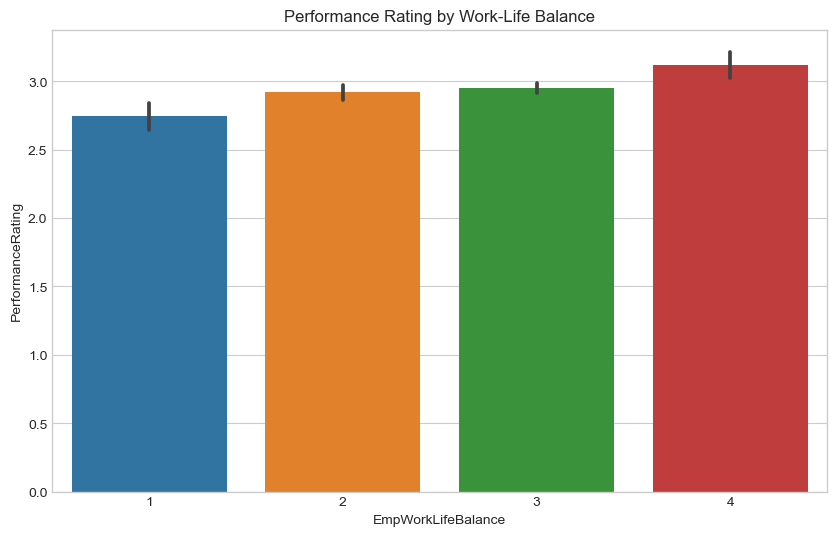

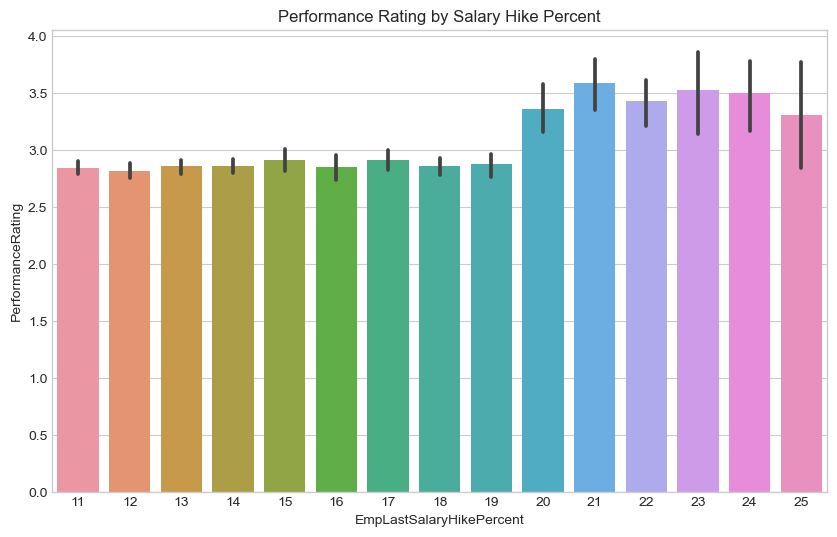

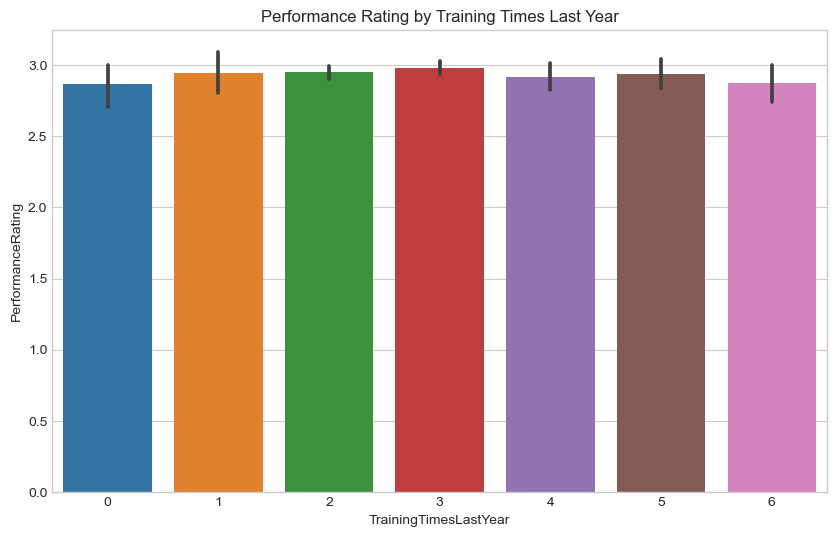

In [173]:
#Visualize more  variables  to understand the relationship between variables against performance rating

#consider the following  columns: 
 #work-life balance, salary hike percent, training times last year and total work experience in years

# Work-Life Balance in Relation to Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='EmpWorkLifeBalance', y='PerformanceRating', data=df)
plt.title('Performance Rating by Work-Life Balance')
plt.show()

# Salary Hike Percent and Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='EmpLastSalaryHikePercent', y='PerformanceRating', data=df)
plt.title('Performance Rating by Salary Hike Percent')
plt.show()

# Training Times and Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='TrainingTimesLastYear', y='PerformanceRating', data=df)
plt.title('Performance Rating by Training Times Last Year')
plt.show()




Notes

1. Performance Rating by Work-Life Balance
This barplot shows a general trend where higher work-life balance ratings are associated with higher performance ratings.
The relationship suggests that employees who rate their work-life balance more favorably tend to have better performance ratings.
2. Performance Rating by Salary Hike Percent
The scatter plot illustrates the distribution of performance ratings across different levels of the last salary hike percent.
While there's some variability, there appears to be a cluster of higher performance ratings at higher salary hike percentages. This could indicate a positive impact of salary hikes on performance, but further statistical analysis would be needed to confirm this.
3. Performance Rating by Training Times Last Year
The bar plot displays the average performance ratings across different counts of training times last year.
There doesn’t seem to be a clear linear relationship between the number of training sessions and performance ratings. It indicates that simply increasing training frequency may not directly correlate with improved performance ratings.


*Interpretations

-Work-Life Balance: The analysis underscores the importance of work-life balance in enhancing employee performance. It might be beneficial to explore policies or programs that help improve work-life balance.

-Salary Hike Percent: The potential positive impact of salary hikes on performance ratings warrants a closer look. Understanding the context of these hikes (e.g., merit-based, across-the-board increases) could provide deeper insights.

-Training Times: The lack of a clear trend suggests that the quality, relevance, or type of training might be more critical than the quantity. Further analysis could explore what types of training are most effective.

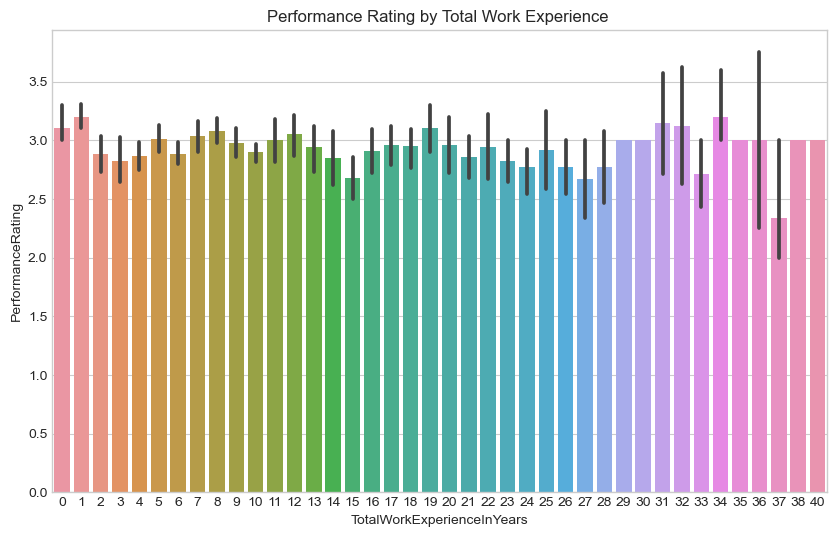

In [174]:
#  Visualization of Total Work Experience In Years and Performance
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalWorkExperienceInYears', y='PerformanceRating', data=df)
plt.title('Performance Rating by Total Work Experience ')
plt.show()

There is no clear linear relationship between experience and performance

In [175]:
#created bins to interpret it easily

bins = [-1, 5, 15, 25, 40]
labels = ["Early Career (0-5)", 
          "Mid Career (6-15)", 
          "Senior (16-25)", 
          "Veteran (26+)"]

df["ExperienceLevel"] = pd.cut(
    df["TotalWorkExperienceInYears"],
    bins=bins,
    labels=labels
)

df[["TotalWorkExperienceInYears", "ExperienceLevel"]].head()

,TotalWorkExperienceInYears,ExperienceLevel
0,10,Mid Career (6-15)
1,20,Senior (16-25)
2,20,Senior (16-25)
3,23,Senior (16-25)
4,10,Mid Career (6-15)


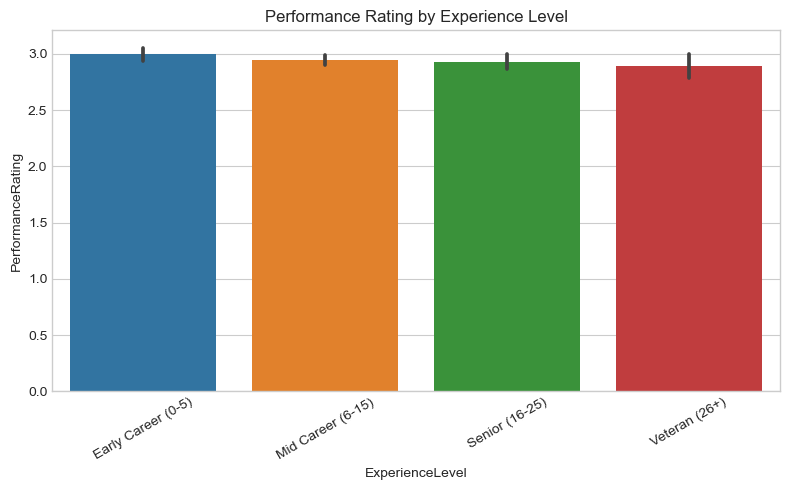

In [176]:
plt.figure(figsize=(8,5))

sns.barplot( x="ExperienceLevel",y="PerformanceRating",data=df)

plt.xticks(rotation=30)
plt.title("Performance Rating by Experience Level")
plt.tight_layout()
plt.show()

Performance ratings remain consistent across all career stages. 
Grouping experience into meaningful bins did not reveal significant variation in ratings.

This suggests that total work experience alone is not a strong driver of performance outcomes 
and may interact with other factors such as role, department, or job level.

DATA PREPROCESSING

In [177]:
X_model.columns


Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating'],
      dtype='object')

In [178]:
#Defined features and target
X = df.drop(columns=['EmpNumber', 'Attrition', 'ExperienceLevel', 'PerformanceRating'])
y = df["PerformanceRating"]

#Encoded Categorical Variables
categorical_cols= X.select_dtypes(include=["object"]).columns
numerical_cols= X.select_dtypes(exclude=["object"]).columns

#ColumnTransformer
preprocessor= ColumnTransformer(transformers=[
    ("num",StandardScaler(), numerical_cols),
    ("cat",OneHotEncoder(drop="first", handle_unknown="ignore"),categorical_cols)
])



In [180]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

Predictive Model

In [181]:
#Logistic Regression
log_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model",LogisticRegression(max_iter=1000))
])
log_pipeline.fit(X_train, y_train)

log_preds = log_pipeline.predict(X_test)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, log_preds))

print("\nClassification Report:\n",
      classification_report(y_test, log_preds))

Logistic Regression Accuracy: 0.825

Classification Report:
               precision    recall  f1-score   support

           2       0.61      0.49      0.54        39
           3       0.86      0.93      0.89       175
           4       0.84      0.62      0.71        26

    accuracy                           0.82       240
   macro avg       0.77      0.68      0.72       240
weighted avg       0.82      0.82      0.82       240



In [182]:
#Random Forest
rf_pipeline = Pipeline(steps=[
    ("Preprocessing", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])
rf_pipeline.fit(X_train, y_train)

rf_preds = rf_pipeline.predict(X_test)

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf_preds))

Random Forest Accuracy: 0.9166666666666666


In [183]:
#Gradient Boosting 
gb_pipeline = Pipeline(steps=[
    ("Preprocessing", preprocessor),
    ("model", GradientBoostingClassifier(random_state=42))
])
gb_pipeline.fit(X_train, y_train)

gb_preds = gb_pipeline.predict(X_test)

print("Gradient Boosting Accuracy:",
      accuracy_score(y_test, gb_preds))

Gradient Boosting Accuracy: 0.9333333333333333


In [186]:
#Hyperparameter Tuning (Random Forest)
param_grid = {
    "model__n_estimators": [100, 200],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

grid = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    n_jobs=-1
)
#fit
grid.fit(X_train, y_train)

#saved the best pipeline and model
best_pipeline = grid.best_estimator_
best_rf = best_pipeline.named_steps["model"]

print("Best Parameters:", grid.best_params_)



tuned_preds = grid.predict(X_test)

print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, tuned_preds))

Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Tuned Random Forest Accuracy: 0.9208333333333333


In [196]:
#Cross Validation
cv_scores = cross_val_score(best_pipeline, X, y, cv=5)

print("Cross Validation Accuracy:", cv_scores.mean())
print("Std Dev:", cv_scores.std())

Cross Validation Accuracy: 0.9166666666666666
Std Dev: 0.031180478223116172


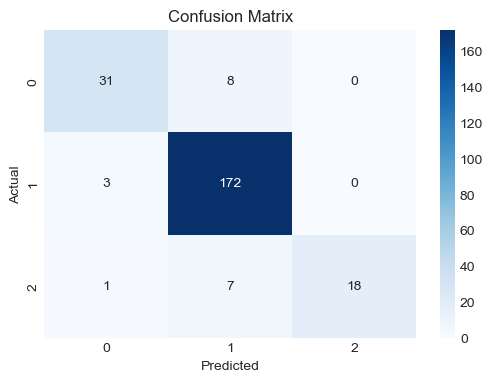

In [197]:
#Confusion Matrix
cm = confusion_matrix(y_test, tuned_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

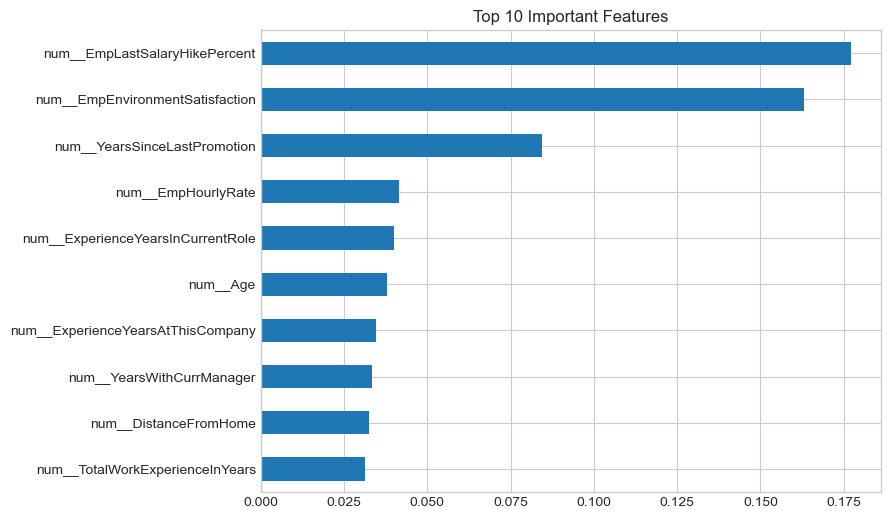

In [189]:
#get best pipeline and model
best_pipeline= grid.best_estimator_
best_rf= best_pipeline.named_steps["model"]

#get transformed feature names
feature_names= best_pipeline.named_steps["Preprocessing"].get_feature_names_out()
#Feature Importance
feature_importances = pd.Series(
    best_rf.feature_importances_,
    index=feature_names
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importances.head(10).plot(kind="barh")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()

In [190]:
print(classification_report(y_test, tuned_preds))

              precision    recall  f1-score   support

           2       0.89      0.79      0.84        39
           3       0.92      0.98      0.95       175
           4       1.00      0.69      0.82        26

    accuracy                           0.92       240
   macro avg       0.94      0.82      0.87       240
weighted avg       0.92      0.92      0.92       240



## Model Performance Comparison

In [191]:
results = []
models= {
    "Logisitic Regression": log_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline,
    "Tuned Model":grid
}

for name, model in models.items():
    y_pred=model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })
    
  
        

In [192]:
results_df= pd.DataFrame(results)
results_df =results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)

metric_cols=["Accuracy", "Precision", "Recall", "F1 Score"]
results_df[metric_cols]= results_df[metric_cols].round(3)

results_df.style.format({
    "Accuracy": "{:.3f}",
    "Precision": "{:.3f}",
    "Recall": "{:.3f}",
    "F1 Score": "{:.3f}"
}).highlight_max(subset=metric_cols, color="lightgreen")

,Model,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosting,0.933,0.933,0.933,0.932
1,Tuned Model,0.921,0.923,0.921,0.918
2,Random Forest,0.917,0.920,0.917,0.913
3,Logisitic Regression,0.825,0.816,0.825,0.817


## Key Insights
- Employees with high environment satisfaction tend to perform better
- Salary hike percentage strongly influences performance rating
- Experience and training play a key role in performance prediction

## Business Recommendation
HR departments should focus on employee satisfaction  and structured training programs to improve performance outcomes.

In [198]:
#Save the model
import joblib

joblib.dump(gb_pipeline, "employee_performance_model.pkl")


['employee_performance_model.pkl']